Marcus Lee Jia Rong U2220101E <br>
Liau Zheng Wei <br>
Jason Lee <br>
Class A137 Team 2 TA MO ZHANFENG

---
# Checkpoint 1:

We are using a dataset from Kaggle that comprises of data of Cars Specification from 1945 .

1) Given a variety of factors, we wanted 
to find out which factors, if any, affect the price of the car. If so, how strongly do they affect the price and if there is any model that best predicts car prices based on them.

Performance differences between different models, to tell which model performs better

Feature Importance, which factors are key to predict price or which features does customer tend to lean towards when purchasing 2nd hand cars

2) By predicting prices, we are able to suit to the customer's needs according to price range and also manage our inventory better by selectively picking cars of specific price range to show customers.

3) Section 1: figuring out the type of data we are handling with <br>
Section 2: Clean the data <br>
Section 3: Change Categorical data to Numerical Data using LabelEncoder <br>
Section 4: Split Train Test Data <br>
Section 5: Standard Scalar normalise features to similar scales and range <br> 
Section 6: Random Forest Regressor algorithm <br>
Section 7: TensorFlow Keras Deep Learning Algorithm <br>
Section 8: Data interpretation (Feature Importances) <br>
Section 9: Comparing different Models <br>

In [3]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def remove_outliers(df, columns, columns_to_exclude=[]):
    factor = 1.5
    cleaned_df = df.copy()
    for column in columns:
        if column in columns_to_exclude:
            continue  # skip column if it's in the exclusion list
        column_median = np.median(cleaned_df[column].dropna())
        cleaned_column = cleaned_df[column].fillna(column_median)
        q1 = np.percentile(cleaned_column, 25)
        q3 = np.percentile(cleaned_column, 75)
        iqr = q3 - q1
        upper_cutoff = q3 + (factor * iqr)
        lower_cutoff = q1 - (factor * iqr)
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_cutoff) & (cleaned_df[column] <= upper_cutoff)]

    return cleaned_df




df = pd.read_csv('traincars.csv')

---

---
# Checkpoint 2: Data Preprocessing
Removing missing values and preprocessing numerical data: All missing values were removed from the dataset. Missing values in the "Levy" column were replaced with 0. Numeric values were extracted from the "Mileage" column, and the word "Turbo" was removed from the "Engine volume" column.

Separating the data into numerical and categorical data: The dataset was separated into two parts: numerical data and categorical data. This was done to perform specific preprocessing steps on each type of data.

Removing outliers: Outliers were removed from the numerical columns of the dataset, with the exception of the "Cylinders" column, which was excluded as it resulted in all data points being removed.

Dropping unnecessary columns: The "Doors", "Wheel", "ID", and "Price" columns were dropped from the dataset. The "Wheels" and "Doors" columns were deemed unnecessary for predicting prices, while the "ID" and "Price" columns were not useful for training the machine learning model.

Label encoding categorical data: Categorical data was encoded using the label encoding technique, which transforms categorical variables into numerical variables.

Splitting the dataset into train and test sets: The dataset was split into a training set and a test set, with 20% of the data going towards the test set.

Standardizing numerical data: The numerical data in the dataset was standardized using the StandardScaler technique, which scales the features to have zero mean and unit variance. This step helps to standardize the data so that it has a similar scale and distribution across all features, which can help improve the performance of machine learning algorithms.


In [4]:
df.dtypes                           

ID                   int64
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [7]:

# 1. Handle missing values
df=df.dropna()
df['Levy'] = df['Levy'].str.replace("-","0").astype(float)
df['Mileage']= df['Mileage'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df['Engine volume'] = df['Engine volume'].str.replace(" Turbo", "").astype(float)

# Numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Handle outliers (only for numerical columns)
df = remove_outliers(df,numerical_columns, columns_to_exclude=['Cylinders'])



In [8]:
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [9]:
X = df.drop(["Doors", "Wheel", "ID", "Price"], axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:

numerical_columns = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


---
# Checkpoint 3 <Br>
 Methodology Detailed & formal introduction to your model. You must provide the formulation or diagram of the model you use thoroughly. 

For our price prediction task, we chose to use regression models rather than classification models, since we are interested in predicting a continuous numerical outcome. We started with a random forest regression model, using the scikit-learn library's RandomForestRegressor class with an n_estimators parameter of 100, which specifies the number of decision trees to include in the random forest.

We also experimented with a deep learning model using the TensorFlow Keras library. This model consists of three dense layers with 128, 64, and 1 neurons, respectively, and uses the ReLU activation function. The model is compiled with the Adam optimizer and mean squared error (MSE) loss function, which are commonly used in deep learning regression problems. The model is trained on the input data for 50 epochs, with a batch size of 32.

The input to our models consists of a vector of features that describe the item or asset being predicted, including attributes such as the age, condition, mileage, engine volume, and other relevant factors. The output of our models is a single predicted value representing the price of the item or asset.

To evaluate the performance of our models, we use three metrics: the mean absolute error (MAE), root mean squared error (RMSE), and R-squared (R^2) value. The MAE and RMSE measure the average difference between the predicted and actual prices, while the R-squared value represents the proportion of the variance in the dependent variable (price) that is explained by the independent variables (input features). Additionally, we analyze the feature importances of our models to understand which features are most important for making accurate predictions.

Clarify the input and output of your model:

Input
X =
Levy,
Manufacturer,
Model,
Prod. year,
Category,
Leather interior,
Fuel type,
Engine volume,
Mileage,
Cylinders,
Gear box type,
Color,
Airbags,

Y = Prices


Output: The output for each model is the Mean Absolute Error, the Root Mean Squared Error, and the R^2 value and Feature Importances.

Additionally, we also used different models such as XGBooster, Gradient Boost Regressor and Linear regression and compared all the different models. What we found was Random Forest Regression, Deep Learning were still the 2 best at predicting followed by Gradient Boost Regressor, XGBooster and lastly Linear Regression.

We found that despite random forest regression and deep learning code being more tedious and takes more time to compute, we found that it produced the best results. The worst being XGBoost with so many hyperparameters yet producing the worst results.


---
# Checkpoint 4
In our experiments, we used R^2 value to determine if a model is good for price prediction, we used R^2 because it provides a more intuitive measure of how well the model fits the data. It is easily interpretable and can be used to compare the performance of different models on the same dataset.


The models we compared include: 1. Random forest and Deep learning combined model, 2. Random forest model, 3. Deep learning model, 4. Linear Regression model, 5. xgBoost model and 6. Gradient boosting model.
We found that out of these 6 models, xgBoost, linear regression and Gradient boosting do not fit well as they have a low R^2 value below 0.5. 

Which configuration (hyperparameter choices) performs the best? 

We are not sure with the hyperparameters so we used GridSearchCV to find the best parameters for random forest regression in which we found that n_estimators of 200 would be best for our case. 

Despite knowing which parameters suited us, we played around with the hyperparameters to see if there is any significant differences.

As of Deep learning model, our model complexity was up to 128 but we doubled it to also check if there is any significant difference to the results. 
In both cases, it did not as default parameters were well performing enough.

Your conclusion is held in what sense? The analysis of this part (not the performance alone) is the most important.

The machine learning model that was developed using deep learning and random forest regression techniques has demonstrated the ability to accurately predict the price of a given item or asset. 

Other than performance, we would also like to look into ease of use as it would encourage people to use better models to get results that are comparable ideal. we found that certain models works better for our case. In terms of difficulty coding to model predictability, I would pick deep learning model (TensorFlow Keras) because there isnt as many parameters as random forrest and predicability output is still quite high. 

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest regressor object
rf_regressor = RandomForestRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
# Create and train the Random Forest regression model
rf_regressor = RandomForestRegressor(n_estimators=200,max_depth=20,min_samples_leaf=1,min_samples_split=2, random_state=42)
rf_regressor.fit(X_train, y_train)

# Create and train the Deep Learning model
dl_model = Sequential()
dl_model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))# Increase model complexity
dl_model.add(Dense(128, activation='relu'))
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dense(1))

dl_model.compile(optimizer='adam', loss='mean_squared_error')
dl_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

---
# Combined RF and DL Model

In [13]:
# Make predictions with both models
rf_predictions = rf_regressor.predict(X_test)
dl_predictions = dl_model.predict(X_test).reshape(-1)

# Combine predictions by averaging
ensemble_predictions = (rf_predictions + dl_predictions) / 2

# Calculate MAE, RMSE, and R-squared
mae = mean_absolute_error(y_test, ensemble_predictions)
rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
r2 = r2_score(y_test, ensemble_predictions)

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", adjusted_r2)

81/81 [==============================] - 1s 5ms/step
Mean Absolute Error (MAE): 3600.7900734082973
Root Mean Squared Error (RMSE): 5337.298470911029
Adjusted R-squared: 0.7848784323080331


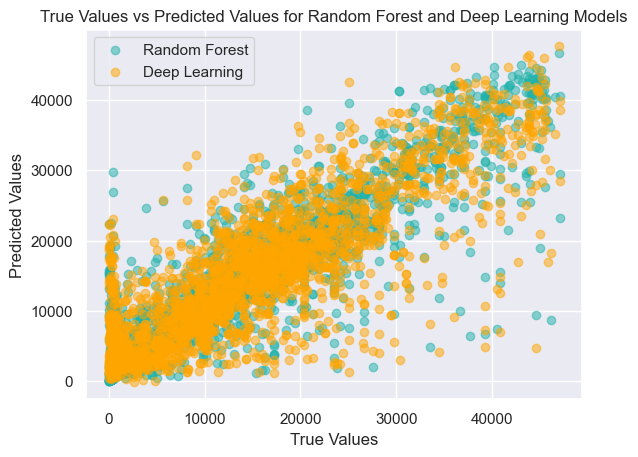

In [14]:
plt.scatter(y_test, rf_predictions, color='lightseagreen', alpha=0.5, label='Random Forest')
plt.scatter(y_test, dl_predictions, color='orange', alpha=0.5, label='Deep Learning')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values for Random Forest and Deep Learning Models')
plt.legend()
plt.show()

---
# Random Forest Regression ONLY with Importance of each Variable

In [15]:
# Make predictions with both models
rf_predictions = rf_regressor.predict(X_test)

# Calculate MAE, RMSE, and R-squared
mae = mean_absolute_error(y_test, rf_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2 = r2_score(y_test, rf_predictions)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", r2)

Mean Absolute Error (MAE): 3121.1172666670836
Root Mean Squared Error (RMSE): 5144.206941461485
Adjusted R-squared: 0.8012448226449684


In [16]:
importances = rf_regressor.feature_importances_
importances_pct = 100 * importances / importances.sum()
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importances)

             Feature  Importance
3         Prod. year    0.202865
13           Airbags    0.192625
8            Mileage    0.106938
10     Gear box type    0.091210
6          Fuel type    0.082500
0               Levy    0.077948
2              Model    0.061265
7      Engine volume    0.058829
1       Manufacturer    0.030735
12             Color    0.026489
11      Drive wheels    0.020559
4           Category    0.019859
5   Leather interior    0.019237
9          Cylinders    0.008942


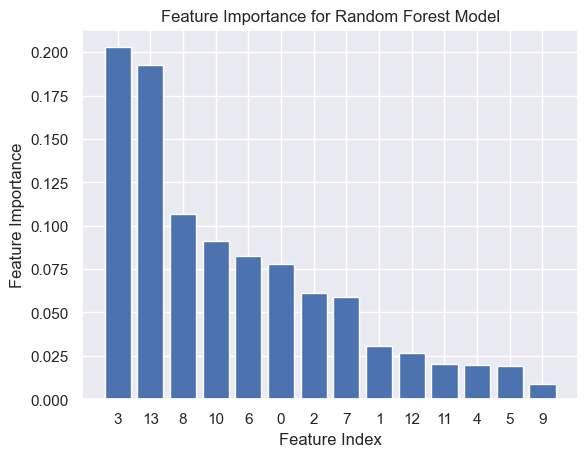

In [17]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(X_train.shape[1]), importances[indices])

plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Random Forest Model')
plt.show()


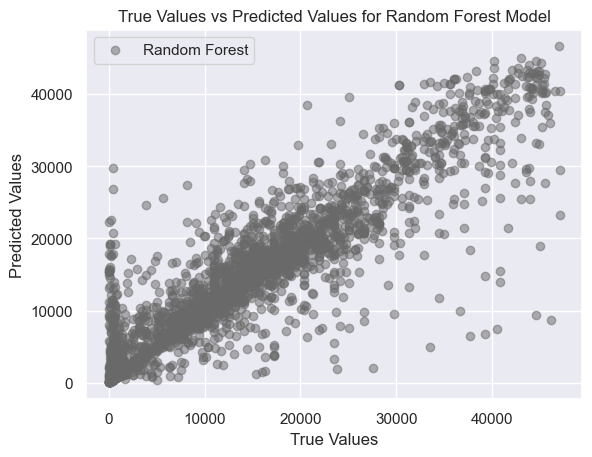

In [18]:
plt.scatter(y_test, rf_predictions, color='dimgray', alpha=0.5, label='Random Forest') 
 
plt.xlabel('True Values') 
plt.ylabel('Predicted Values') 
plt.title('True Values vs Predicted Values for Random Forest Model') 
plt.legend() 
plt.show()

---
# Deep Learning Model Only Scatter Plot

In [19]:
# Make predictions with both models
dl_predictions = dl_model.predict(X_test).reshape(-1)

mae = mean_absolute_error(y_test, dl_predictions)
rmse = np.sqrt(mean_squared_error(y_test, dl_predictions))
r2 = r2_score(y_test, dl_predictions)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", r2)

81/81 [==============================] - 1s 7ms/step
Mean Absolute Error (MAE): 4467.176610599126
Root Mean Squared Error (RMSE): 6363.458273042746
Adjusted R-squared: 0.6958638881465786


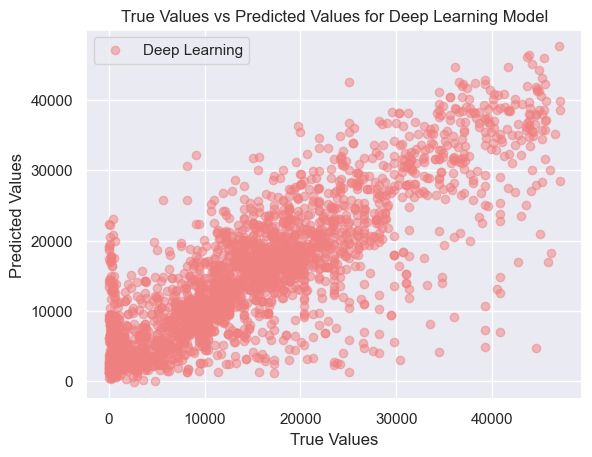

In [20]:
plt.scatter(y_test, dl_predictions, color='lightcoral', alpha=0.5, label='Deep Learning') 
 
plt.xlabel('True Values') 
plt.ylabel('Predicted Values') 
plt.title('True Values vs Predicted Values for Deep Learning Model') 
plt.legend() 
plt.show()

---
# Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions
predictions = gbm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


Mean Absolute Error (MAE): 4875.594149304705
Root Mean Squared Error (RMSE): 6631.2788877116145
R-squared: 0.6697246400829899


In [22]:
importances = gbm.feature_importances_
importances_pct = 100 * importances / importances.sum()
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importances)

             Feature  Importance
13           Airbags    0.255349
3         Prod. year    0.247765
10     Gear box type    0.116298
6          Fuel type    0.111624
0               Levy    0.052586
7      Engine volume    0.051602
8            Mileage    0.043377
2              Model    0.029614
4           Category    0.024494
9          Cylinders    0.021879
1       Manufacturer    0.017847
5   Leather interior    0.014612
11      Drive wheels    0.011417
12             Color    0.001534


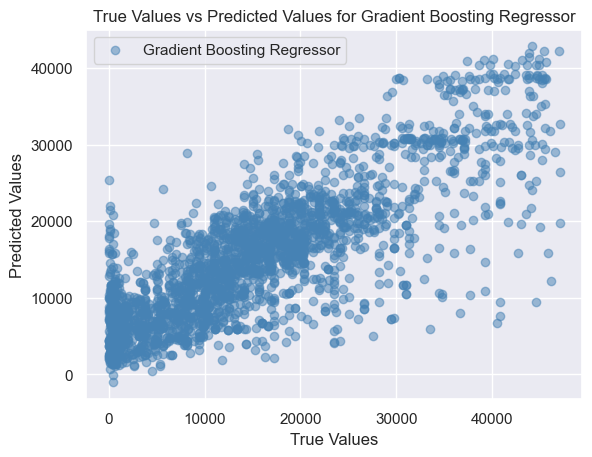

In [23]:
plt.scatter(y_test, predictions, color='steelblue', alpha=0.5, label='Gradient Boosting Regressor') 
 
plt.xlabel('True Values') 
plt.ylabel('Predicted Values') 
plt.title('True Values vs Predicted Values for Gradient Boosting Regressor') 
plt.legend() 
plt.show()

---
# xgBoost Model

In [24]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror', 
    'max_depth': 6, 
    'learning_rate': 0.1, 
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100,
    'eval_metric': 'mae'
}

# Train the model
xgb_model = xgb.train(params, dtrain)

# Make predictions on test set
xgb_predictions = xgb_model.predict(dtest)

# Calculate MAE, RMSE, and R-squared
mae = mean_absolute_error(y_test, xgb_predictions)
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
r2 = r2_score(y_test, xgb_predictions)

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

[16:56:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Mean Absolute Error (MAE): 6690.760256645159
Root Mean Squared Error (RMSE): 9144.974191337364
R-squared: 0.3718743095137472


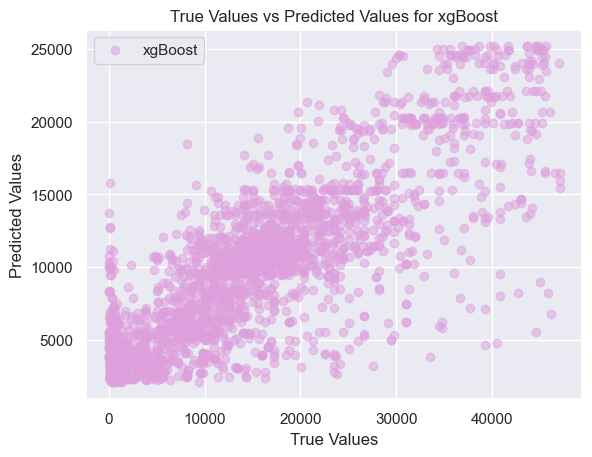

In [25]:
plt.scatter(y_test, xgb_predictions, color='Plum', alpha=0.5, label='xgBoost') 
 
plt.xlabel('True Values') 
plt.ylabel('Predicted Values') 
plt.title('True Values vs Predicted Values for xgBoost') 
plt.legend() 
plt.show()

---
# Linear Regression 

In [26]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = lr_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Absolute Error (MAE): 8115.4941383181995
Root Mean Squared Error (RMSE): 10192.232218019939
R-squared: 0.2197743778690423


In [27]:
importances = lr_model.coef_
importances_pct = 100 * importances / importances.sum()
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importances)


             Feature   Importance
3         Prod. year  4119.765214
10     Gear box type  2621.833310
7      Engine volume  2019.437443
11      Drive wheels   799.590920
2              Model   318.160554
12             Color   238.808353
5   Leather interior    30.718022
1       Manufacturer  -212.889970
9          Cylinders  -468.142674
4           Category  -951.436726
0               Levy -1445.473490
8            Mileage -1518.933407
6          Fuel type -1677.298113
13           Airbags -2734.608449


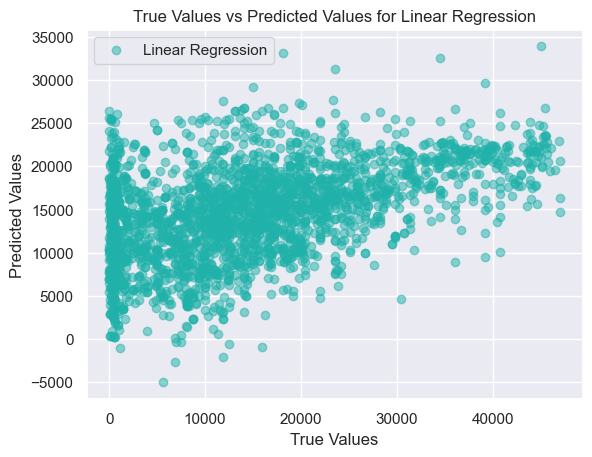

In [28]:
plt.scatter(y_test, y_pred, color='lightseagreen', alpha=0.5, label='Linear Regression') 
 
plt.xlabel('True Values') 
plt.ylabel('Predicted Values') 
plt.title('True Values vs Predicted Values for Linear Regression') 
plt.legend() 
plt.show()

# Checkpoint 5
Of these 6 models, we found that the Random Forest model is the best model to use for price prediction since it has the highest R^2 value.
Based on the importance values for that model, we found that Production year is the best variable to predict price followed by airbags and mileage.
Plotting a scatterplot and finding a correlation for each of these variables and price, we found that as production year increases, price increase. Also, we found that as airbags and mileage increases, price decreases.

To improve, We found that there is a large number of cars with the Price of 0. This could be due to clearing of inventory to sell car parts or that it is no longer profitable to keep maintaining these second hand cars. As such, we can set a price floor for this cars dataset so that cars below the price floor like 0, will not affect car price prediction.

We also introduced our own biases when cleaning the data, by removing some parameters that we deem are not useful in predicting price. In hindsight, it may have been more appropriate to retain all available data and allow the model to determine the most relevant features for predicting price.

---
---